In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [4]:
df = pd.read_csv("testset.csv")
df.head(5)

datetime_utc  _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
0  19961101-11:00   Smoke       9.0      0       0           NaN   27.0   
1  19961101-12:00   Smoke      10.0      0       0           NaN   32.0   
2  19961101-13:00   Smoke      11.0      0       0           NaN   44.0   
3  19961101-14:00   Smoke      10.0      0       0           NaN   41.0   
4  19961101-16:00   Smoke      11.0      0       0           NaN   47.0   

    _precipm   _pressurem   _rain   _snow   _tempm   _thunder   _tornado  \
0        NaN       1010.0       0       0     30.0          0          0   
1        NaN      -9999.0       0       0     28.0          0          0   
2        NaN      -9999.0       0       0     24.0          0          0   
3        NaN       1010.0       0       0     24.0          0          0   
4        NaN       1011.0       0       0     23.0          0          0   

    _vism   _wdird  _wdire   _wgustm   _windchillm   _wspdm  
0     5.0    280.0    West       NaN           NaN      7.4  
1     NaN      0.0   North       NaN           NaN      NaN  
2     NaN      0.0   North       NaN           NaN      NaN  
3     2.0      0.0   North       NaN           NaN      NaN  
4     1.2      0.0   North       NaN           NaN      0.0

### Given dataset provides the weather data for city Delhi, India. We will try to predict the weather <b>_conds</b> field. Like weather will be smoke, Haze, Clear.

In [5]:
# Printing all the columns
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [6]:
#Removing extra whitespaces
df.columns = map(lambda x: x.strip(), df.columns)

In [7]:
# Printing all the columns
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [8]:
# Lets check the usual whether codition. We can see usually delhi's weather is either Haze, Smoke. Not good
# for health. :()
df._conds.value_counts(ascending=False)

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

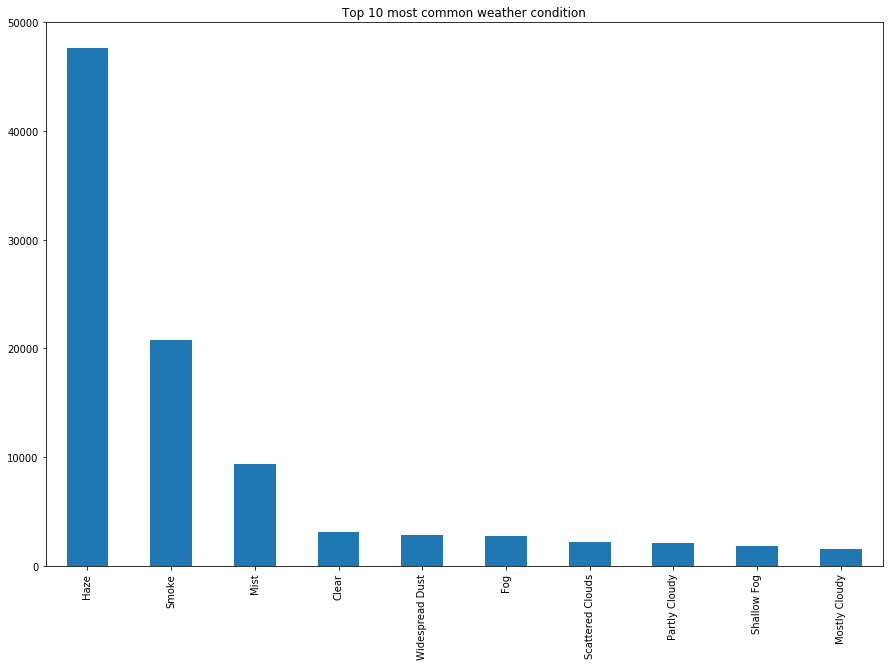

In [9]:
# Lets plot top 10 weather condition in delhi.
plt.figure(figsize=(15, 10));
df._conds.value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.plot();
# We can clearly see that haze and smoe are the most commo weather condition in delhi.

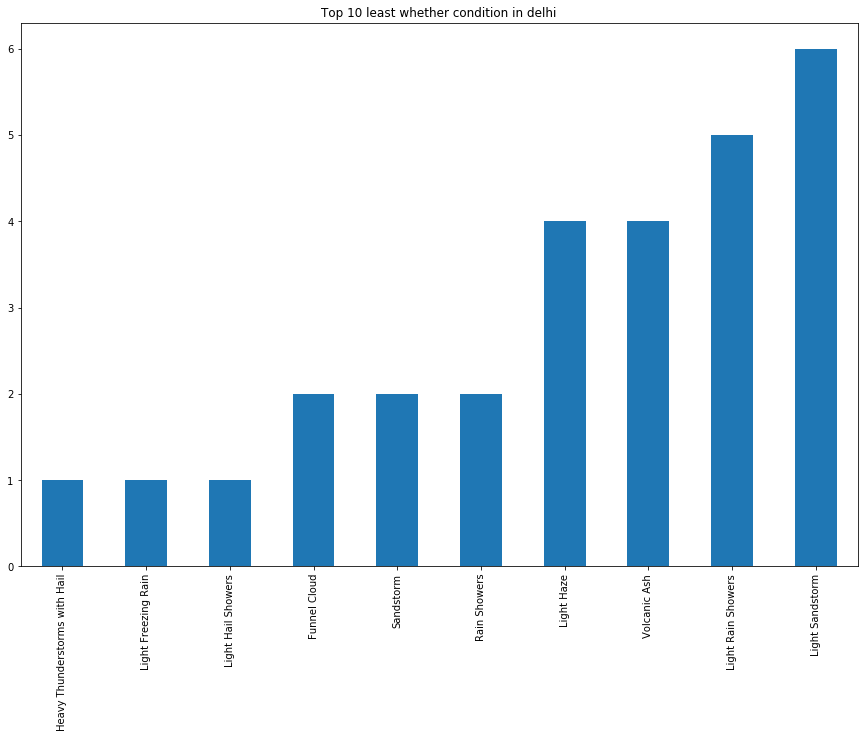

In [10]:
# Lets see top 10 least condition
plt.figure(figsize=(15, 10));
df._conds.value_counts(ascending=True).head(10).plot(kind="bar");
plt.title("Top 10 least whether condition in delhi");
plt.plot();

In [11]:
# common wind direction
df._wdire.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

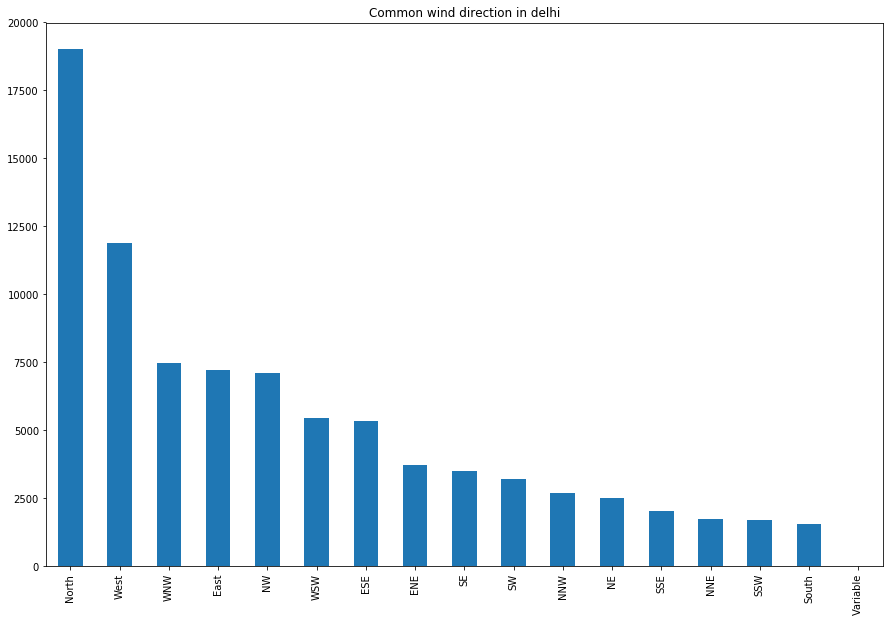

In [12]:
plt.figure(figsize=(15, 10));
plt.title("Common wind direction in delhi");
df._wdire.value_counts().plot(kind="bar");
plt.plot();

In [13]:
# Average temprature
print("average temprature in delhi:", round(df._tempm.mean(axis=0),2))

average temprature in delhi: 25.45


In [14]:
# As we can see there is datetime column, We can extract year from it. Year can ve an important feature
# for us to calculate how temprature is changing according to year
def extract_year(value):
    return (value[0:4])

In [15]:
# function to get month
def extract_month(value):
    return (value[4:6])

In [16]:
# Lets check our method
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [17]:
df.head() # So we can see a new column with year added

datetime_utc _conds  _dewptm  _fog  _hail  _heatindexm  _hum  _precipm  \
0  19961101-11:00  Smoke      9.0     0      0          NaN  27.0       NaN   
1  19961101-12:00  Smoke     10.0     0      0          NaN  32.0       NaN   
2  19961101-13:00  Smoke     11.0     0      0          NaN  44.0       NaN   
3  19961101-14:00  Smoke     10.0     0      0          NaN  41.0       NaN   
4  19961101-16:00  Smoke     11.0     0      0          NaN  47.0       NaN   

   _pressurem  _rain  ...  _thunder  _tornado  _vism  _wdird  _wdire  _wgustm  \
0      1010.0      0  ...         0         0    5.0   280.0    West      NaN   
1     -9999.0      0  ...         0         0    NaN     0.0   North      NaN   
2     -9999.0      0  ...         0         0    NaN     0.0   North      NaN   
3      1010.0      0  ...         0         0    2.0     0.0   North      NaN   
4      1011.0      0  ...         0         0    1.2     0.0   North      NaN   

  _windchillm  _wspdm  year  month  
0         NaN     7.4  1996     11  
1         NaN     NaN  1996     11  
2         NaN     NaN  1996     11  
3         NaN     NaN  1996     11  
4         NaN     0.0  1996     11  

[5 rows x 22 columns]

In [18]:
# lets check out data range
print("max, min: ", df.year.max(), ",", df.year.min())

max, min:  2017 , 1996


Given data is from 1996 to 2017. 

In [19]:
# Number of records for paticular year
df.year.value_counts()

2003    13186
2004     9151
2002     8503
2001     8403
2016     6634
1997     6513
1999     6300
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
2017     1420
1996     1278
Name: year, dtype: int64

In [20]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

In [21]:
df_mean = df.groupby("year")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)

In [22]:
df_mean.dtypes

year       object
_tempm    float64
dtype: object

In [23]:
# Converting object to float
df_mean.year = df_mean.year.astype("float")
df_mean.dtypes

year      float64
_tempm    float64
dtype: object

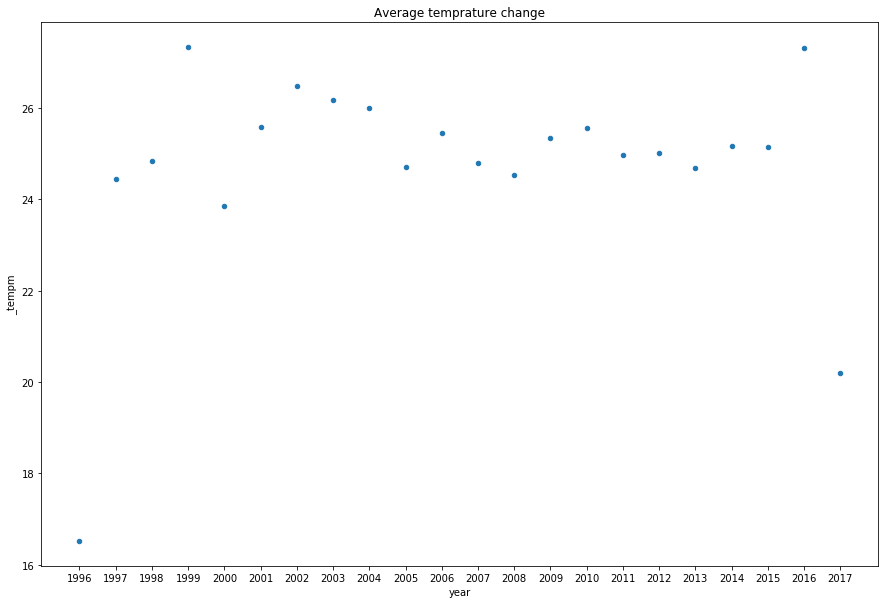

In [24]:
df_mean.plot(kind="scatter", x="year", y="_tempm", figsize=(15, 10))

plt.xticks(df_mean.year);
plt.title("Average temprature change");
plt.plot();

So u can see there was a big change in year 1996-1997. It may be because of many reasons:
1. New industries started in the city.
2. People started purchasing more vehicles.
or any other reasons.

In [25]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
dtype: int64

In [26]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm', 'year', 'month'],
      dtype='object')

In [27]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail',
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month"]]

In [28]:
# Lets replace missing values in _dewptm. We can take an avrgae of that year
df_filtered[df_filtered._dewptm.isnull()]

datetime_utc           _conds  _dewptm  _fog  _hail   _hum  \
124    19961108-01:00            Smoke      NaN     0      0    NaN   
240    19961113-02:00            Smoke      NaN     0      0    NaN   
303    19961116-06:00          Unknown      NaN     0      0    NaN   
520    19961126-04:00            Smoke      NaN     0      0    NaN   
584    19961129-18:00            Smoke      NaN     0      0    NaN   
812    19961210-09:00             Haze      NaN     0      0    NaN   
820    19961210-17:00          Unknown      NaN     0      0    NaN   
830    19961211-07:00          Unknown      NaN     0      0    NaN   
858    19961212-19:00            Smoke      NaN     0      0    NaN   
969    19961218-00:00      Shallow Fog      NaN     1      0    NaN   
971    19961218-02:00      Shallow Fog      NaN     1      0    NaN   
1032   19961221-00:00          Unknown      NaN     0      0    NaN   
1033   19961221-01:00          Unknown      NaN     0      0    NaN   
1082   19961223-03:00            Smoke      NaN     0      0    NaN   
1113   19961224-13:00            Smoke      NaN     0      0    NaN   
1147   19961226-02:00      Shallow Fog      NaN     1      0    NaN   
1150   19961226-07:00          Unknown      NaN     0      0    NaN   
1243   19961230-12:00            Smoke      NaN     0      0    NaN   
1272   19961231-18:00          Unknown      NaN     0      0    NaN   
1281   19970101-03:00          Unknown      NaN     0      0    NaN   
1388   19970106-02:00          Unknown      NaN     0      0    NaN   
1559   19970113-23:00          Unknown      NaN     0      0    NaN   
1566   19970114-06:00            Smoke      NaN     0      0    NaN   
1581   19970114-21:00      Shallow Fog      NaN     1      0    NaN   
1806   19970126-01:00              Fog      NaN     1      0    NaN   
1813   19970126-08:00            Smoke      NaN     0      0    NaN   
1910   19970130-13:00            Smoke      NaN     0      0    NaN   
1911   19970130-14:00            Smoke      NaN     0      0    NaN   
2061   19970207-08:00          Unknown      NaN     0      0    NaN   
2129   19970210-09:00             Haze      NaN     0      0    NaN   
...               ...              ...      ...   ...    ...    ...   
74019  20090128-09:00             Haze      NaN     0      0    NaN   
76072  20091018-03:00            Smoke      NaN     0      0    NaN   
77701  20100514-12:00             Haze      NaN     0      0    NaN   
80228  20110422-18:00            Smoke      NaN     0      0    NaN   
80398  20110516-18:00             Haze      NaN     0      0    NaN   
80660  20110611-21:00          Unknown      NaN     0      0    NaN   
81279  20110831-06:00             Haze      NaN     0      0    NaN   
81671  20111023-15:00             Mist      NaN     0      0    NaN   
86610  20131108-09:00            Smoke      NaN     0      0    NaN   
88880  20140813-09:00             Haze      NaN     0      0    NaN   
90594  20150316-09:00             Haze      NaN     0      0    NaN   
91285  20150610-21:00             Haze      NaN     0      0    NaN   
92014  20150906-15:00             Haze      NaN     0      0    NaN   
92015  20150906-18:00             Haze      NaN     0      0    NaN   
92016  20150906-21:00             Haze      NaN     0      0    NaN   
93361  20160204-02:00              Fog      NaN     1      0    NaN   
94528  20160423-06:00             Haze      NaN     0      0    NaN   
94890  20160516-10:00          Unknown      NaN     0      0    NaN   
95095  20160528-01:30             Haze      NaN     0      0    NaN   
95248  20160607-03:00             Haze      NaN     0      0  243.0   
95303  20160610-13:00       Light Rain      NaN     0      0    NaN   
95547  20160626-11:00             Haze      NaN     0      0    NaN   
95622  20160701-09:00             Haze      NaN     0      0    NaN   
95640  20160702-11:00             Haze      NaN     0      0    NaN   
96696  20160825-13:00    Mostly C

In [29]:
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val
    

In [30]:
df_filtered[df_filtered._dewptm.isnull()] # We replaced null values fof _dewtmp

Empty DataFrame
Columns: [datetime_utc, _conds, _dewptm, _fog, _hail, _hum, _pressurem, _rain, _snow, _tempm, _thunder, _tornado, _vism, _wdird, _wdire, _wspdm, year, month]
Index: []

In [31]:
df_filtered.shape

(100990, 18)

In [32]:
df_filtered.isnull().sum()
# so now we have only relevant columns. Lets handle them one by one.

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [33]:
# Handle _hum column.
df_filtered[df_filtered._hum.isnull()]

datetime_utc            _conds    _dewptm  _fog  _hail  _hum  \
124    19961108-01:00             Smoke   5.992851     0      0   NaN   
240    19961113-02:00             Smoke   5.992851     0      0   NaN   
303    19961116-06:00           Unknown   5.992851     0      0   NaN   
520    19961126-04:00             Smoke   5.992851     0      0   NaN   
584    19961129-18:00             Smoke   5.992851     0      0   NaN   
812    19961210-09:00              Haze   5.992851     0      0   NaN   
820    19961210-17:00           Unknown   5.992851     0      0   NaN   
830    19961211-07:00           Unknown   5.992851     0      0   NaN   
858    19961212-19:00             Smoke   5.992851     0      0   NaN   
969    19961218-00:00       Shallow Fog   5.992851     1      0   NaN   
971    19961218-02:00       Shallow Fog   5.992851     1      0   NaN   
1032   19961221-00:00           Unknown   5.992851     0      0   NaN   
1033   19961221-01:00           Unknown   5.992851     0      0   NaN   
1082   19961223-03:00             Smoke   5.992851     0      0   NaN   
1113   19961224-13:00             Smoke   5.992851     0      0   NaN   
1147   19961226-02:00       Shallow Fog   5.992851     1      0   NaN   
1150   19961226-07:00           Unknown   5.992851     0      0   NaN   
1243   19961230-12:00             Smoke   5.992851     0      0   NaN   
1272   19961231-18:00           Unknown   5.992851     0      0   NaN   
1281   19970101-03:00           Unknown  17.052394     0      0   NaN   
1388   19970106-02:00           Unknown  17.052394     0      0   NaN   
1559   19970113-23:00           Unknown  17.052394     0      0   NaN   
1566   19970114-06:00             Smoke  17.052394     0      0   NaN   
1581   19970114-21:00       Shallow Fog  17.052394     1      0   NaN   
1806   19970126-01:00               Fog  17.052394     1      0   NaN   
1813   19970126-08:00             Smoke  17.052394     0      0   NaN   
1842   19970127-15:00             Smoke  10.000000     0      0   NaN   
1910   19970130-13:00             Smoke  17.052394     0      0   NaN   
1911   19970130-14:00             Smoke  17.052394     0      0   NaN   
2061   19970207-08:00           Unknown  17.052394     0      0   NaN   
...               ...               ...        ...   ...    ...   ...   
92219  20151002-18:00              Mist  20.000000     0      0   NaN   
92222  20151003-03:00               NaN  19.000000     0      0   NaN   
92342  20151018-09:00               NaN  22.000000     0      0   NaN   
93353  20160203-03:00    Patches of Fog   8.000000     1      0   NaN   
93361  20160204-02:00               Fog  18.274320     1      0   NaN   
94322  20160409-12:00              Haze  14.000000     0      0   NaN   
94527  20160423-03:00               NaN  15.000000     0      0   NaN   
94528  20160423-06:00              Haze  18.274320     0      0   NaN   
94777  20160509-09:00              Haze  20.000000     0      0   NaN   
94890  20160516-10:00           Unknown  18.274320     0      0   NaN   
95095  20160528-01:30              Haze  18.274320     0      0   NaN   
95104  20160528-09:00              Haze  20.000000     0      0   NaN   
95303  20160610-13:00        Light Rain  18.274320     0      0   NaN   
95547  20160626-11:00              Haze  18.274320     0      0   NaN   
95622  20160701-09:00              Haze  18.274320     0      0   NaN   
95640  20160702-11:00              Haze  18.274320     0      0   NaN   
96221  20160808-06:00              Haze  26.000000     0      0   NaN   
96696  20160825-13:00     Mostly Cloudy  18.274320     0      0   NaN   
96831  20160830-15:00              Mist  25.000000     0      0   NaN   
96965  20160907-08:30              Haze  18.274320     0      0   NaN   
97063  20160915-09:00              Haze  22.000000     0      0   NaN   
97259  20160924-12:30              Haze  18.274320     0      0   NaN   
97490  20161003-18:00  Scattered Clouds  26.000000     0      0   N

In [34]:
# We will use the same logic o replace as we did before.
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val
    

In [35]:
df_filtered[df_filtered._hum.isnull()] # replaced

Empty DataFrame
Columns: [datetime_utc, _conds, _dewptm, _fog, _hail, _hum, _pressurem, _rain, _snow, _tempm, _thunder, _tornado, _vism, _wdird, _wdire, _wspdm, year, month]
Index: []

In [36]:
df_filtered.isnull().sum() # Now lets handle _pressurem

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [37]:
df_filtered[df_filtered._pressurem.isnull()]

datetime_utc                  _conds  _dewptm  _fog  _hail  _hum  \
60703  20040625-21:00                    Haze     21.0     0      0  62.0   
60723  20040628-09:00                    Haze     20.0     0      0  27.0   
60728  20040629-00:00                    Haze     21.0     0      0  63.0   
60921  20040723-09:00                    Haze     24.0     0      0  37.0   
61255  20040829-18:00                    Haze     27.0     0      0  75.0   
61270  20040831-15:00                    Haze     24.0     0      0  54.0   
61394  20040911-09:00                    Haze     21.0     0      0  38.0   
62409  20050114-03:00                   Smoke      7.0     0      0  64.0   
62501  20050125-15:00                    Haze     10.0     0      0  84.0   
63218  20050426-15:00                    Haze     16.0     0      0  31.0   
63267  20050502-18:00         Widespread Dust     16.0     0      0  49.0   
63312  20050508-09:00                    Haze     15.0     0      0  18.0   
63329  20050510-12:00         Widespread Dust      4.0     0      0   7.0   
63793  20050708-03:00                    Haze     27.0     0      0  89.0   
63857  20050716-09:00                    Haze     27.0     0      0  64.0   
63861  20050716-21:00                    Haze     26.0     0      0  90.0   
64037  20050808-03:00                    Haze     22.0     0      0  61.0   
64100  20050816-00:00                    Haze     26.0     0      0  85.0   
64134  20050820-06:00                    Haze     23.0     0      0  44.0   
64160  20050823-12:00                    Haze     24.0     0      0  44.0   
64219  20050830-21:00                    Haze     24.0     0      0  66.0   
64271  20050906-12:00                    Haze     24.0     0      0  43.0   
64508  20051006-06:00                    Haze     19.0     0      0  37.0   
64649  20051023-21:00                    Mist     14.0     0      0  75.0   
64670  20051026-18:00                    Mist     15.0     0      0  74.0   
65299  20060110-21:00                    Mist      5.0     0      0  92.0   
65327  20060114-09:00                   Smoke      1.0     0      0  13.0   
65347  20060116-21:00                    Mist     12.0     0      0  90.0   
65450  20060130-06:00                   Smoke      2.0     0      0  16.0   
65489  20060204-03:00                    Mist     10.0     0      0  74.0   
...               ...                     ...      ...   ...    ...   ...   
91530  20150711-15:00                    Rain     25.0     0      0  97.0   
91531  20150711-18:00                 Drizzle     25.0     0      0  96.0   
91549  20150714-00:00                    Mist     26.0     0      0  87.0   
91634  20150724-15:00                    Haze     26.0     0      0  65.0   
91637  20150725-00:00                    Mist     25.0     0      0  76.0   
91658  20150727-15:00                    Mist     26.0     0      0  82.0   
91783  20150808-12:00                    Mist     27.0     0      0  79.0   
91802  20150810-21:00                    Mist     27.0     0      0  89.0   
91863  20150818-12:00  Thunderstorms and Rain     24.0     0      0  67.0   
91888  20150821-15:00                    Mist     28.0     0      0  90.0   
91904  20150823-15:00                    Haze     26.0     0      0  67.0   
91965  20150831-12:00                    Haze     24.0     0      0  42.0   
91974  20150901-15:00                    Haze     22.0     0      0  45.0   
94523  20160422-15:00           Light Drizzle     13.0     0      0  24.0   
95154  20160531-12:00                    Haze     23.0     0      0  35.0   
95309  20160611-03:00                    Haze     23.0     0      0  60.0   
95402  20160617-03:00                    Haze     24.0     0      0  60.0   
95405  20160617-06:00                    Haze     23.0     0      0  38.0   
95555  20160627-03:00                    Mist     27.0     0      0  69.0   
95883  20160717-21:00                    Mist     25.0     0      0  90.0   
95960

In [38]:
df_filtered.head()

datetime_utc _conds  _dewptm  _fog  _hail  _hum  _pressurem  _rain  \
0  19961101-11:00  Smoke      9.0     0      0  27.0      1010.0      0   
1  19961101-12:00  Smoke     10.0     0      0  32.0     -9999.0      0   
2  19961101-13:00  Smoke     11.0     0      0  44.0     -9999.0      0   
3  19961101-14:00  Smoke     10.0     0      0  41.0      1010.0      0   
4  19961101-16:00  Smoke     11.0     0      0  47.0      1011.0      0   

   _snow  _tempm  _thunder  _tornado  _vism  _wdird _wdire  _wspdm  year month  
0      0    30.0         0         0    5.0   280.0   West     7.4  1996    11  
1      0    28.0         0         0    NaN     0.0  North     NaN  1996    11  
2      0    24.0         0         0    NaN     0.0  North     NaN  1996    11  
3      0    24.0         0         0    2.0     0.0  North     NaN  1996    11  
4      0    23.0         0         0    1.2     0.0  North     0.0  1996    11

In [39]:
# if you see pressure column, there are few -9999 values. Which is obviously bad values and it can affect your
# calculations very badly. So we will consider this also missing values. Lets convert them first to the nan
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [40]:
df_filtered.head() # so now -9999.0 is Nan.Lets again get the number of missing values in _pressurem

datetime_utc _conds  _dewptm  _fog  _hail  _hum  _pressurem  _rain  \
0  19961101-11:00  Smoke      9.0     0      0  27.0      1010.0      0   
1  19961101-12:00  Smoke     10.0     0      0  32.0         NaN      0   
2  19961101-13:00  Smoke     11.0     0      0  44.0         NaN      0   
3  19961101-14:00  Smoke     10.0     0      0  41.0      1010.0      0   
4  19961101-16:00  Smoke     11.0     0      0  47.0      1011.0      0   

   _snow  _tempm  _thunder  _tornado  _vism  _wdird _wdire  _wspdm  year month  
0      0    30.0         0         0    5.0   280.0   West     7.4  1996    11  
1      0    28.0         0         0    NaN     0.0  North     NaN  1996    11  
2      0    24.0         0         0    NaN     0.0  North     NaN  1996    11  
3      0    24.0         0         0    2.0     0.0  North     NaN  1996    11  
4      0    23.0         0         0    1.2     0.0  North     0.0  1996    11

In [41]:
df_filtered._pressurem.isnull().sum() # So u can see previsously it was 232 and now its 983. 
# We need to check the data for this kind of errors.
# So we will use the same idea as before We will replace missing values with the mean values of _hum column
# for that partcular year.

983

In [42]:

for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val
    

In [43]:
df_filtered.isnull().sum() # pressurem is also resolved. Lets apply same for other columns. I will make
# it quickly. Process will be the same as above.

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [44]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val
    

In [45]:
for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val

In [46]:
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val

In [47]:
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val

In [48]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm              0
_thunder            0
_tornado            0
_vism               0
_wdird              0
_wdire          14755
_wspdm              0
year                0
month               0
dtype: int64

In [49]:
# As we can see _wdire is a categorical feature so we can not apply mean here. We have to get the most frequent
# value of _wdire for a year and then replace missing value with the most frequent value.
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

In [50]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
dtype: int64

In [51]:
# now we can see,  _conds which is again acategorical feature.
# so we will apply again the same strategy as above(_wdire)
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [52]:
df_filtered.isnull().sum()


datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
dtype: int64

In [53]:
df_filtered.year = df_filtered.year.astype("object")
df_filtered.month = df_filtered.month.astype("object")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [54]:
df_filtered.dtypes

datetime_utc     object
_conds           object
_dewptm         float64
_fog              int64
_hail             int64
_hum            float64
_pressurem      float64
_rain             int64
_snow             int64
_tempm          float64
_thunder          int64
_tornado          int64
_vism           float64
_wdird          float64
_wdire           object
_wspdm          float64
year             object
month            object
dtype: object

In [55]:
pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean")

month         01         02         03         04         05         06  \
year                                                                      
1996         NaN        NaN        NaN        NaN        NaN        NaN   
1997   13.048083  15.825284  21.173384  26.300805  29.900929  31.735553   
1998   13.144290  16.510567  19.882767  28.698630  33.991784  32.450593   
1999   12.594269  16.743446  22.465106  31.419503  34.269136  34.281680   
2000   13.803659  15.104891        NaN  35.000000  26.000000  32.442863   
2001   12.658686  18.287586  23.564530  29.666763  32.988538  30.981903   
2002   14.277785  17.470228  24.534641  32.058416  35.373743  34.219867   
2003   11.931473  17.958429  23.538990  31.716751  34.950594  35.455894   
2004   13.232766  18.734445  26.633420  31.858427  34.314077  33.072721   
2005   13.468473  16.835250  23.676773  28.602970  32.276423  33.983122   
2006   13.987500  21.123698  22.526431  29.582979  33.137097  32.070598   
2007   13.394309  17.619822  21.736067  30.457983  31.761019  32.875951   
2008   12.937759  15.565611  25.061475  28.560000  30.258333  30.246862   
2009   14.837522  18.292793  23.450820  29.570213  32.356552  34.567568   
2010   12.861224  18.135008  25.935906  32.769231  34.521186  34.273531   
2011   12.320175  17.025000  22.810185  27.770714  32.952586  32.012592   
2012   12.776256  16.130000  22.683962  28.222222  33.425339  36.033252   
2013   12.255078  16.918938  23.030457  29.000000  33.673015  32.347073   
2014   13.550621  15.805140  21.594262  28.067227  31.412955  34.770833   
2015   12.762669  18.794358  21.569120  27.989273  33.344130  32.737500   
2016   15.007752  19.563948  25.696391  32.535145  34.691920  34.907087   
2017   15.783680  18.414062  23.553459  30.775120        NaN        NaN   

month         07         08         09         10         11         12  
year                                                                     
1996         NaN        NaN        NaN        NaN  19.415046  13.865403  
1997   31.076391  29.450078  29.695443  24.130558  19.957239  13.698195  
1998   29.923938  29.179850  29.119385  25.276475  20.306736  14.682166  
1999   31.998110  32.903209  30.738490  27.700867  22.663247  15.271864  
2000   30.245092  31.881618  30.125521  28.188217  22.112297  16.154194  
2001   30.912933  31.112729  31.174088  27.831502  21.620347  15.959586  
2002   35.355093  30.697186  28.428300  27.166094  21.377793  16.904873  
2003   30.293639  29.966644  28.951836  26.453855  20.371110  15.211904  
2004   32.657179  29.602128  29.948052  24.262331  19.474359  15.534730  
2005   30.176230  31.415323  28.786611  25.068215  19.516949  13.674414  
2006   30.977527  30.555575  29.118214  26.059218  20.211207  15.464956  
2007   31.134146  30.601621  29.179916  24.446222  19.454784  14.552893  
2008   30.721992  29.591837  28.508403  26.453441  19.598291  16.202692  
2009   32.032922  30.914286  28.885200  25.073171  19.283898  14.995781  
2010   31.038529  29.586543  27.670493  26.013333  20.392778  14.008584  
2011   30.631579  29.899563  29.079812  25.607759  20.815166  14.486364  
2012   31.873355  29.180123  29.207921  24.699588  18.783784  15.157609  
2013   30.701923  29.462728  29.839573  26.035176  18.885122  15.288221  
2014   32.233013  31.036970  29.709319  26.484627  20.104167  14.780488  
2015   30.364947  30.235507  30.665254  26.796826  20.754167  14.975709  
2016   30.882036  30.993334  31.500809  28.958941  23.045124  17.777697  
2017         NaN        NaN        NaN        NaN        NaN        NaN

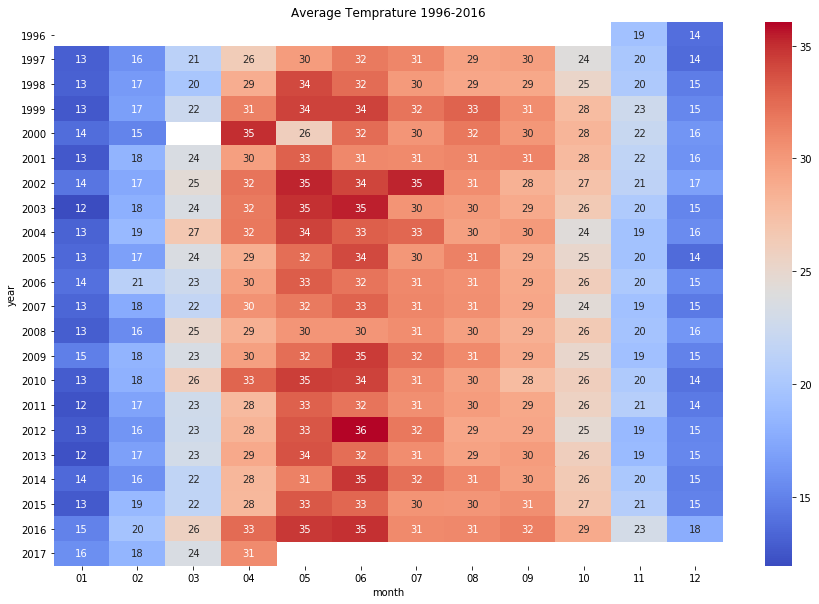

In [56]:
# Heatmap for year and average temprature across the month. More red more heat, more blue less heat
plt.figure(figsize=(15, 10));
sns.heatmap(pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean"),
            cmap="coolwarm", annot=True, cbar=True);
plt.title("Average Temprature 1996-2016")
plt.plot();

Now our dataset doesn't have any missing values in it. Now we should observe one thing. That our _windre is
a categorical column and it is also important to predict a whether but the thing is your model does not understand a text value. So we need to encode this categorical column so that we can change it to integer

In [57]:
df_filtered._conds.value_counts()

Haze                             47674
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [58]:
df_filtered.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wspdm', 'year', 'month'],
      dtype='object')

In [59]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']

In [60]:
# Lets create a new dataset, so that we dont change in our filtered dataset
# We will create dataset in such a way, _wdire(categorical feature in starting position & target variable
# at last which is _conds
df_final = df_filtered[feature_columns]

In [66]:
#df_final.to_csv(r'C:\Users\Sreekar\Desktop\New folder\Weather prediction', index=False)
df_new = pd.DataFrame(df_final, columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds'])
df_new.to_csv("test123.csv")
df_final.head(70)

_wdire  _dewptm  _fog  _hail  _hum   _pressurem  _rain  _snow  _tempm  \
0    West      9.0     0      0  27.0  1010.000000      0      0    30.0   
1   North     10.0     0      0  32.0  1015.429612      0      0    28.0   
2   North     11.0     0      0  44.0  1015.429612      0      0    24.0   
3   North     10.0     0      0  41.0  1010.000000      0      0    24.0   
4   North     11.0     0      0  47.0  1011.000000      0      0    23.0   
5   North     12.0     0      0  56.0  1011.000000      0      0    21.0   
6   North     13.0     0      0  60.0  1010.000000      0      0    21.0   
7   North     13.0     0      0  60.0  1015.429612      0      0    21.0   
8   North     13.0     0      0  68.0  1015.429612      0      0    19.0   
9   North     13.0     0      0  68.0  1010.000000      0      0    19.0   
10  North     13.0     0      0  68.0  1009.000000      0      0    19.0   
11  North     12.0     0      0  64.0  1009.000000      0      0    19.0   
12  North     11.0     0      0  60.0  1010.000000      0      0    19.0   
13  North     11.0     0      0  60.0  1010.000000      0      0    19.0   
14    SSW     10.0     0      0  52.0  1011.000000      0      0    20.0   
15    WSW     10.0     0      0  46.0  1012.000000      0      0    22.0   
16    WSW     10.0     0      0  44.0  1012.000000      0      0    23.0   
17    WSW     11.0     0      0  39.0  1012.000000      0      0    26.0   
18   West     10.0     0      0  32.0  1011.000000      0      0    28.0   
19    WSW     10.0     0      0  29.0  1010.000000      0      0    30.0   
20   West      8.0     0      0  24.0  1009.000000      0      0    31.0   
21   West      7.0     0      0  22.0  1009.000000      0      0    31.0   
22   West      7.0     0      0  22.0  1009.000000      0      0    31.0   
23   West      8.0     0      0  25.0  1009.000000      0      0    30.0   
24    NNE     10.0     0      0  34.0  1009.000000      0      0    27.0   
25  North     11.0     0      0  41.0  1009.000000      0      0    25.0   
26  North     12.0     0      0  53.0  1010.000000      0      0    22.0   
27  North     12.0     0      0  56.0  1010.000000      0      0    21.0   
28  North     12.0     0      0  64.0  1010.000000      0      0    19.0   
29  North     12.0     0      0  60.0  1010.000000      0      0    20.0   
..    ...      ...   ...    ...   ...          ...    ...    ...     ...   
40     SW     12.0     0      0  53.0  1012.000000      0      0    22.0   
41    WSW     14.0     0      0  60.0  1012.000000      0      0    22.0   
42   West     13.0     0      0  44.0  1011.000000      0      0    26.0   
43   West      9.0     0      0  30.0  1010.000000      0      0    28.0   
44    WSW     11.0     0      0  35.0  1010.000000      0      0    28.0   
45   West     11.0     0      0  33.0  1009.000000      0      0    29.0   
46   West     11.0     0      0  33.0  1009.000000      0      0    29.0   
47   West     12.0     0      0  39.0  1009.000000      0      0    27.0   
48  North     12.0     0      0  42.0  1010.000000      0      0    26.0   
49  North     14.0     0      0  60.0  1010.000000      0      0    22.0   
50  North     13.0     0      0  57.0  1011.000000      0      0    22.0   
51  North     13.0     0      0  60.0  1011.000000      0      0    21.0   
52  North     12.0     0      0  56.0  1011.000000      0      0    21.0   
53  North     13.0     0      0  64.0  1011.000000      0      0    20.0   
54  North     12.0     0      0  60.0  1011.000000      0      0    20.0   
55  North     12.0     0      0  64.0  1011.000000      0      0    19.0   
56  North     13.0     0      0  68.0  1010.000000      0      0    19.0   
57  North     12.0     0      0  64.0  1010.000000      0      0    19.0   
58  North     13.0     0      0  77.0  1010.000000      0      0    17.0   
59  North     13.0     0      0  77.0  1010.000000      0      0    17.0   
60  North     12.0     0      0  68.0  1011.000000 

In [67]:
df_final.dtypes

_wdire         object
_dewptm       float64
_fog            int64
_hail           int64
_hum          float64
_pressurem    float64
_rain           int64
_snow           int64
_tempm        float64
_thunder        int64
_tornado        int64
_vism         float64
_wdird        float64
_wspdm        float64
year           object
month          object
_conds         object
dtype: object

In [68]:
df_final._wdire.value_counts()

West        19970
North       19714
NW          13110
WNW          7464
East         7233
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

In [69]:
wdire_dummies = pd.get_dummies(df_final["_wdire"])

In [70]:
df_final = pd.concat([wdire_dummies, df_final], axis=1)

In [71]:
df_new1 = pd.DataFrame(df_final, columns = ['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'])
df_new1.to_csv("test11.csv")
df_final.head()

ENE  ESE  East  NE  NNE  NNW  NW  North  SE  SSE  ...  _snow  _tempm  \
0    0    0     0   0    0    0   0      0   0    0  ...      0    30.0   
1    0    0     0   0    0    0   0      1   0    0  ...      0    28.0   
2    0    0     0   0    0    0   0      1   0    0  ...      0    24.0   
3    0    0     0   0    0    0   0      1   0    0  ...      0    24.0   
4    0    0     0   0    0    0   0      1   0    0  ...      0    23.0   

   _thunder  _tornado     _vism  _wdird    _wspdm  year  month  _conds  
0         0         0  5.000000   280.0  7.400000  1996     11   Smoke  
1         0         0  2.198981     0.0  5.052735  1996     11   Smoke  
2         0         0  2.198981     0.0  5.052735  1996     11   Smoke  
3         0         0  2.000000     0.0  5.052735  1996     11   Smoke  
4         0         0  1.200000     0.0  0.000000  1996     11   Smoke  

[5 rows x 34 columns]

In [72]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', '_conds'],
      dtype='object')

In [73]:
df_final.drop("_wdire", inplace=True, axis=1)

In [74]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

In [75]:
X = df_final.iloc[:, 0:-1]
X.shape
print (X)

        ENE  ESE  East  NE  NNE  NNW  NW  North  SE  SSE  ...  _rain  _snow  \
0         0    0     0   0    0    0   0      0   0    0  ...      0      0   
1         0    0     0   0    0    0   0      1   0    0  ...      0      0   
2         0    0     0   0    0    0   0      1   0    0  ...      0      0   
3         0    0     0   0    0    0   0      1   0    0  ...      0      0   
4         0    0     0   0    0    0   0      1   0    0  ...      0      0   
5         0    0     0   0    0    0   0      1   0    0  ...      0      0   
6         0    0     0   0    0    0   0      1   0    0  ...      0      0   
7         0    0     0   0    0    0   0      1   0    0  ...      0      0   
8         0    0     0   0    0    0   0      1   0    0  ...      0      0   
9         0    0     0   0    0    0   0      1   0    0  ...      0      0   
10        0    0     0   0    0    0   0      1   0    0  ...      0      0   
11        0    0     0   0    0    0   0      1   0 

In [79]:
y = df_final.iloc[:, -1]
print (y)

0                      Smoke
1                      Smoke
2                      Smoke
3                      Smoke
4                      Smoke
5                      Smoke
6                      Smoke
7                      Smoke
8                      Smoke
9                      Smoke
10                     Smoke
11                     Smoke
12                     Smoke
13                     Smoke
14                     Smoke
15                     Smoke
16                     Smoke
17                     Smoke
18                     Clear
19                     Clear
20                     Clear
21                     Clear
22                     Clear
23                     Smoke
24                     Smoke
25                     Smoke
26                     Smoke
27                     Smoke
28                     Smoke
29                     Smoke
                 ...        
100960                  Haze
100961                  Haze
100962                  Haze
100963        

In [77]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y.shape
print (y)

[31 31 31 ...  5  5  5]


In [78]:
joblib.dump(X, 'X.pkl')
joblib.dump(y, 'y.pkl')

['y.pkl']